In [349]:
import os, glob
import pandas as pd
import numpy as np
import scipy 
import matplotlib
from matplotlib import pyplot as plt 
import seaborn as sns 
import statsmodels
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error, r2_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb


In [174]:
path = 'myo-dataset-main/dataset'

df = pd.DataFrame()

for folder in os.listdir(path):
    new_path=path+'/'+folder
    for filename in glob.glob(os.path.join(new_path, '*-emg.csv')):
        temp=abs(pd.read_csv(filename))
        temp['gesture']=len(filename.split('-')[3])
        #temp1=temp.groupby('gesture').mean()
        df = pd.concat([df, temp.groupby('gesture', as_index = False).mean()], ignore_index=True)

In [175]:
df

,gesture,index,timestamp,0,1,2,3,4,5,6,7
0,5,203.5,1.596832e+15,6.340686,21.495098,39.757353,7.590686,4.071078,27.002451,25.213235,8.659314
1,5,201.5,1.596832e+15,7.299505,21.663366,36.816832,8.014851,4.628713,25.341584,28.608911,10.009901
2,5,201.5,1.596832e+15,7.789604,31.539604,38.754950,10.081683,4.433168,30.556931,32.534653,11.705446
3,5,201.5,1.596832e+15,6.450495,19.497525,30.153465,7.363861,3.801980,16.730198,27.920792,8.381188
4,5,200.5,1.596832e+15,7.375622,21.845771,34.711443,7.268657,4.636816,22.895522,31.134328,7.425373
...,...,...,...,...,...,...,...,...,...,...,...
1885,8,201.5,1.597840e+15,4.938119,9.767327,23.049505,6.982673,4.103960,3.561881,9.306931,4.646040
1886,8,201.5,1.597840e+15,5.237624,11.183168,21.267327,7.136139,3.883663,4.279703,8.079208,5.903465
1887,8,201.0,1.597840e+15,3.709677,9.220844,25.076923,5.895782,3.997519,3.652605,9.218362,3.997519
1888,8,203.5,1.597840e+15,4.431373,9.196078,22.600490,7.176471,3.953431,4.686275,8.352941,5.671569


In [185]:
df1=df.replace([4, 5, 8], [0, 1, 2])
df1

,gesture,index,timestamp,0,1,2,3,4,5,6,7
0,1,203.5,1.596832e+15,6.340686,21.495098,39.757353,7.590686,4.071078,27.002451,25.213235,8.659314
1,1,201.5,1.596832e+15,7.299505,21.663366,36.816832,8.014851,4.628713,25.341584,28.608911,10.009901
2,1,201.5,1.596832e+15,7.789604,31.539604,38.754950,10.081683,4.433168,30.556931,32.534653,11.705446
3,1,201.5,1.596832e+15,6.450495,19.497525,30.153465,7.363861,3.801980,16.730198,27.920792,8.381188
4,1,200.5,1.596832e+15,7.375622,21.845771,34.711443,7.268657,4.636816,22.895522,31.134328,7.425373
...,...,...,...,...,...,...,...,...,...,...,...
1885,2,201.5,1.597840e+15,4.938119,9.767327,23.049505,6.982673,4.103960,3.561881,9.306931,4.646040
1886,2,201.5,1.597840e+15,5.237624,11.183168,21.267327,7.136139,3.883663,4.279703,8.079208,5.903465
1887,2,201.0,1.597840e+15,3.709677,9.220844,25.076923,5.895782,3.997519,3.652605,9.218362,3.997519
1888,2,203.5,1.597840e+15,4.431373,9.196078,22.600490,7.176471,3.953431,4.686275,8.352941,5.671569


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761295 entries, 0 to 761294
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   index      761295 non-null  int64
 1   timestamp  761295 non-null  int64
 2   0          761295 non-null  int64
 3   1          761295 non-null  int64
 4   2          761295 non-null  int64
 5   3          761295 non-null  int64
 6   4          761295 non-null  int64
 7   5          761295 non-null  int64
 8   6          761295 non-null  int64
 9   7          761295 non-null  int64
 10  gesture    761295 non-null  int64
dtypes: int64(11)
memory usage: 63.9 MB


In [258]:
df1.describe()

,index,timestamp,0,1,2,3,4,5,6,7,gesture
count,761295.000000,7.612950e+05,761295.000000,761295.000000,761295.000000,761295.000000,761295.000000,761295.000000,761295.000000,761295.000000,761295.000000
mean,200.907090,1.597613e+15,11.945999,14.513094,21.024947,14.756654,6.679082,7.261154,11.986801,11.556578,0.999997
std,116.289414,4.453389e+11,17.809517,18.677942,24.457429,18.587859,8.661976,11.339258,18.438210,16.193962,0.816459
min,0.000000,1.596832e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,1.596992e+15,2.000000,3.000000,4.000000,3.000000,2.000000,1.000000,2.000000,2.000000,0.000000
50%,201.000000,1.597840e+15,5.000000,8.000000,12.000000,8.000000,4.000000,3.000000,4.000000,5.000000,1.000000
75%,302.000000,1.597982e+15,14.000000,18.000000,28.000000,19.000000,8.000000,8.000000,14.000000,15.000000,2.000000
max,419.000000,1.598293e+15,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,2.000000


<Axes: >

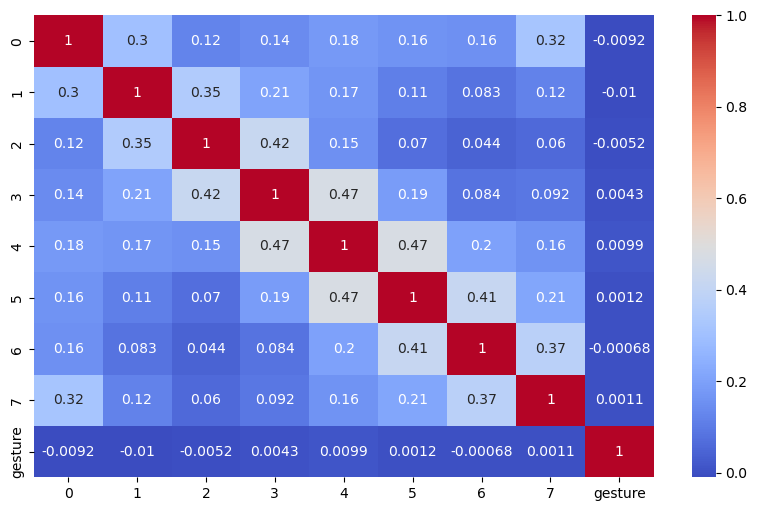

In [215]:
corr_df = df1.drop(["timestamp","index"],axis=1)
corr = corr_df.corr(method="spearman")

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data=corr, cmap="coolwarm", annot = True)

In [186]:
y=df1["gesture"]
X=df1[df1.columns.difference(['gesture',"timestamp","index"])]

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [390]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNeighborsClassifier

In [391]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [392]:
y_pred = classifier.predict(X_test)

In [393]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
ac

0.9241622574955908

# RandomForestClassifier

In [402]:
rf=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth= 20, min_samples_leaf= 5, n_estimators=50, oob_score=True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [403]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
ac

0.8659611992945326

# XGBClassifier

In [346]:

clf = xgb.XGBClassifier(tree_method="auto", objective="multi:softmax",  num_class=3)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [347]:
y_pred = clf.predict(X_test)

In [348]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
ac

0.8977072310405644

In [277]:
temp=pd.read_csv("myo-dataset-main/dataset/s1_r_2/s1_r_2-paper-2-emg.csv")

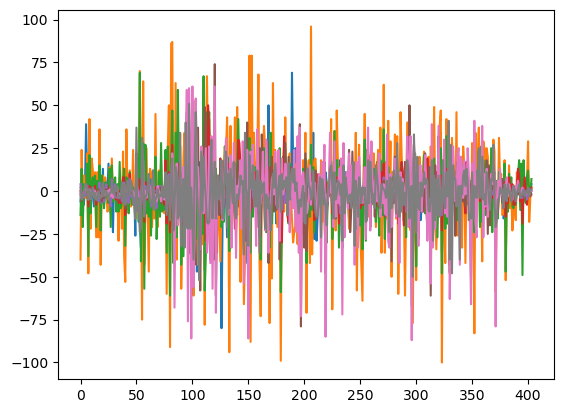

In [278]:
plt.plot(temp["index"], temp["0"])
plt.plot(temp["index"], temp["1"])
plt.plot(temp["index"], temp["2"])
plt.plot(temp["index"], temp["3"])
plt.plot(temp["index"], temp["4"])
plt.plot(temp["index"], temp["5"])
plt.plot(temp["index"], temp["6"])
plt.plot(temp["index"], temp["7"])

In [198]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [12]:
categoric_cols = ["gesture"]
df2 = pd.get_dummies(df,columns=categoric_cols,dtype=float)
#df2.drop(columns=["gesture"],inplace=True)
df2.head(10)

,index,timestamp,0,1,2,3,4,5,6,7,gesture_paper,gesture_rock,gesture_scissors
0,0,1596831563636338,1,17,103,11,1,6,2,5,1.0,0.0,0.0
1,1,1596831563636338,3,12,22,17,5,0,1,1,1.0,0.0,0.0
2,2,1596831563637337,2,6,10,2,1,1,1,7,1.0,0.0,0.0
3,3,1596831563637337,1,27,86,8,0,0,7,0,1.0,0.0,0.0
4,4,1596831563638338,3,13,106,10,2,15,1,5,1.0,0.0,0.0
5,5,1596831563638338,1,4,45,2,1,3,10,6,1.0,0.0,0.0
6,6,1596831563642338,4,9,26,0,2,9,7,12,1.0,0.0,0.0
7,7,1596831563642338,0,11,32,4,0,12,4,4,1.0,0.0,0.0
8,8,1596831563657336,3,4,9,6,3,5,3,4,1.0,0.0,0.0
9,9,1596831563657336,2,6,10,0,2,1,0,6,1.0,0.0,0.0


In [13]:
y=df2[["gesture_rock","gesture_paper","gesture_scissors"]]
X=df2[df2.columns.difference(["timestamp","index","gesture_rock","gesture_paper","gesture_scissors"])]

In [52]:
from tensorflow.keras.utils import to_categorical

In [205]:
y_train

236     2
551     0
1764    2
1656    1
208     2
       ..
1130    2
1294    1
860     2
1459    0
1126    0
Name: gesture, Length: 1323, dtype: int64

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [260]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# tensorflow

In [261]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=8))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, to_categorical(y_train), epochs=200,batch_size=10, verbose=0)

In [262]:
test_predictions=np.argmax(model.predict(X_test), axis=1)

18/18 [==============================] - 0s 765us/step


In [263]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),columns=['True Value','Predicted Value'])

true_predicted.head(6) # Show first six rows

,True Value,Predicted Value
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,0,0


In [264]:
ac = accuracy_score(y_test,test_predictions)
ac

0.9329805996472663